In [ ]:
!pip install pytorch-lightning
!pip install pytorch-lightning-bolts

In [ ]:
import pl_bolts
from pl_bolts.models.gans import GAN
import pytorch_lightning as pl
import torchvision
import torch
import numpy as np
import matplotlib
import matplotlib.pyplot as plt





In [ ]:
print("numpy version:",np.__version__)
print("torch version:",torch.__version__)
print("pytorch ligthening version:",pl.__version__)
print("matplotlib version:",matplotlib.__version__)
print("Pytorch Lightening bolts version:",pl_bolts.__version__)

numpy version: 1.19.4
torch version: 1.7.0+cu101
pytorch ligthening version: 1.1.3
matplotlib version: 3.2.2
Pytorch Lightening bolts version: 0.2.5


In [ ]:
image_size = 128
batch_size = 256

T = torchvision.transforms.Compose([torchvision.transforms.Resize(image_size),torchvision.transforms.ToTensor()])
mnist_data = torchvision.datasets.MNIST('mnist_data',transform=T, download=True, train=True)
print("Total images in the Dataset are:", len(mnist_data))

Total images in the Dataset are: 60000


In [ ]:
mnist_dataloader = torch.utils.data.DataLoader(mnist_data, batch_size=batch_size)


In [ ]:
latent_dim=10
GAN_model = GAN(1, image_size,image_size,  latent_dim=latent_dim)

In [ ]:
trainer = pl.Trainer(gpus=1, max_epochs=20)
trainer.fit(GAN_model, train_dataloader= mnist_dataloader)

/usr/local/lib/python3.6/dist-packages/pytorch_lightning/utilities/distributed.py:49: UserWarning: You have set progress_bar_refresh_rate < 20 on Google Colab. This may crash. Consider using progress_bar_refresh_rate >= 20 in Trainer.
  warnings.warn(*args, **kwargs)
GPU available: True, used: True
TPU available: None, using: 0 TPU cores
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name          | Type          | Params
------------------------------------------------
0 | generator     | Generator     | 17.5 M
1 | discriminator | Discriminator | 17.4 M
------------------------------------------------
34.9 M    Trainable params
0         Non-trainable params
34.9 M    Total params


1

In [ ]:
%load_ext tensorboard
%tensorboard --logdir lightning_logs/

In [ ]:
! ls lightning_logs

version_0


In [ ]:
! ls lightning_logs/version_0/checkpoints/

'epoch=19-step=4699.ckpt'


In [ ]:

PATH = 'lightning_logs/version_0/checkpoints/epoch=19-step=4699.ckpt'
gan = GAN.load_from_checkpoint(PATH)



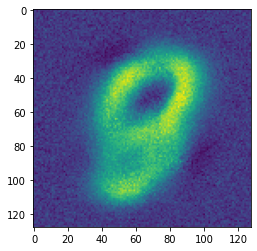

In [ ]:
z = torch.rand(batch_size, latent_dim)
img = gan(z)
plt.imshow(img.detach().numpy()[0].reshape(image_size,image_size))

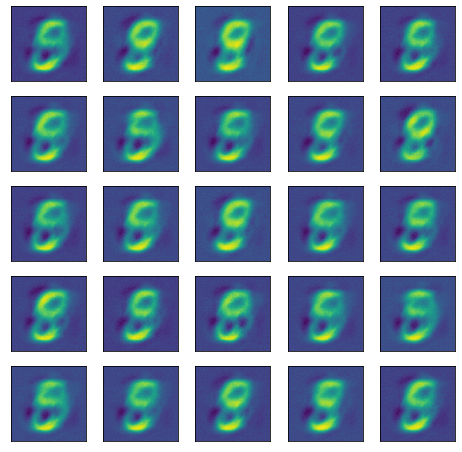

In [ ]:
plt.figure(figsize=(8,8)) # specifying the overall grid size

image_data = []
for val in range(0,25):
  z = torch.rand(batch_size, latent_dim)
  generated_image = gan(z)
  generated_image = generated_image.detach().numpy()[0].reshape(image_size,image_size)
  image_data.append(generated_image)

for i in range(25):
    
    plt.subplot(5,5,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(image_data[i])
    plt.xticks([])
    plt.yticks([])

